In [1]:
pip install google-cloud-bigquery


   ---------------------------------------- 0.0/240.1 kB ? eta -:--:--
   ---------------------------------------  235.5/240.1 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 240.1/240.1 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/156.6 kB ? eta -:--:--
   ---------------------------------------- 156.6/156.6 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/209.5 kB ? eta -:--:--
   ---------------------------------------- 209.5/209.5 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/81.3 kB ? eta -:--:--
   ---------------------------------------- 81.3/81.3 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/221.7 kB ? eta -:--:--
   ---------------------------------------- 221.7/221.7 kB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   - -------------------------------------- 0.2/4.3 MB 4.6 MB/s eta 0:00:01
   - ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.28.3 which is incompatible.


In [2]:
from google.cloud import bigquery
import pandas as pd

# Initialiser le client BigQuery
client = bigquery.Client()

# Charger la table bronze_products
query_bronze_products = """
    SELECT * FROM `crmhetic.crmhetic_bronze.bronze_products`
"""
df_bronze_products = client.query(query_bronze_products).to_dataframe()

# Charger les autres tables bronze si nécessaire
query_bronze_accounts = """
    SELECT * FROM `crmhetic.crmhetic_bronze.bronze_accounts`
"""
df_bronze_accounts = client.query(query_bronze_accounts).to_dataframe()

query_bronze_orders = """
    SELECT * FROM `crmhetic.crmhetic_bronze.bronze_orders`
"""
df_bronze_orders = client.query(query_bronze_orders).to_dataframe()

query_bronze_team_sales = """
    SELECT * FROM `crmhetic.crmhetic_bronze.bronze_team_sales`
"""
df_bronze_team_sales = client.query(query_bronze_team_sales).to_dataframe()

# Afficher un aperçu des données
print(df_bronze_products.head())
print(df_bronze_accounts.head())
print(df_bronze_orders.head())
print(df_bronze_team_sales.head())


DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

### Chargements des tables bronze 

In [1]:
import pandas as pd

# Chargement des données (remplace les chemins par ceux correspondant à tes fichiers ou sources transformées)
bronze_products_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\bronze_products.csv")
clients_account_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\clients_account.csv")
orders_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\orders.csv")
sales_accounts_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\sales_accounts.csv")

# Étape 0 : Correction des données dans `orders_df`
# Remplacer "GTXPro" par "GTX Pro" dans la colonne `product`
orders_df['product'] = orders_df['product'].replace('GTXPro', 'GTX Pro')

# Étape 1 : Renommer les colonnes pour les jointures
# Renommer `account_name` dans `clients_account_df` pour qu'elle corresponde à `account` dans `orders_df`
clients_account_df.rename(columns={"account_name": "account"}, inplace=True)

# Renommer `product_name` dans `bronze_products` pour qu'elle corresponde à `product` dans `orders_df`
bronze_products_df.rename(columns={"product_name": "product"}, inplace=True)

# Étape 2 : Jointures des tables
# 2.1 Joindre `orders` et `clients_account` sur `account`
merged_df = orders_df.merge(clients_account_df, on="account", how="left")

# 2.2 Joindre `bronze_products` sur `product`
merged_df = merged_df.merge(bronze_products_df, on="product", how="left")

# 2.3 Joindre `sales_accounts` sur `sales_agent`
merged_df = merged_df.merge(sales_accounts_df, on="sales_agent", how="left")

# Étape 3 : Vérification du résultat final
print("Table consolidée :")
print(merged_df.head())

# Sauvegarder la table consolidée pour analyse future
merged_df.to_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\merged_bronze_table.csv", index=False)


Table consolidée :
  opportunity_id                                          sale_id_x  \
0       2X86737Q  27745e8a8fa88a714176d44d70472c13df0743025e60b9...   
1       9Q710H4R  27745e8a8fa88a714176d44d70472c13df0743025e60b9...   
2       3GEDSDVN  27745e8a8fa88a714176d44d70472c13df0743025e60b9...   
3       1MQFYGEE  27745e8a8fa88a714176d44d70472c13df0743025e60b9...   
4       L8XNQONA  29c78fa9ed4cab252544c97017ca5af697e82897d0b799...   

      sales_agent                                       product_id_x  \
0  Cecily Lampkin  c63b458fe147d0cef62034c5a2a7f90e0a6c99c9dd571f...   
1  Cecily Lampkin  44d104b1f731f333c3f96e108ac839b12bf5eed91bccf0...   
2  Cecily Lampkin  0f30b37943c4082cddd938d2520cc002b609b1b71e4110...   
3  Cecily Lampkin  dab76893686dfc364e3f02bda691b5eba1ff67df59389f...   
4       Zane Levy  0f30b37943c4082cddd938d2520cc002b609b1b71e4110...   

          product                                       account_id_x account  \
0    GTX Plus Pro  392d640c44563df2496074

In [2]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   opportunity_id       500 non-null    object 
 1   sale_id_x            500 non-null    object 
 2   sales_agent          500 non-null    object 
 3   product_id_x         500 non-null    object 
 4   product              500 non-null    object 
 5   account_id_x         500 non-null    object 
 6   account              500 non-null    object 
 7   deal_stage           500 non-null    object 
 8   engage_at            491 non-null    object 
 9   close_at             463 non-null    object 
 10  close_value          463 non-null    float64
 11  account_id_y         500 non-null    object 
 12  sector               500 non-null    object 
 13  year_founded_at      500 non-null    int64  
 14  revenue              500 non-null    object 
 15  number_of_employees  500 non-null    int

In [69]:
merged_df

,opportunity_id,sale_id_x,sales_agent,product_id_x,product,account_id_x,account,deal_stage,engage_at,close_at,...,number_of_employees,office_location,subsidiary_of,product_id_y,series,sales_price,sale_id_y,manager_id,manager,regional_office
0,2X86737Q,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,Cecily Lampkin,c63b458fe147d0cef62034c5a2a7f90e0a6c99c9dd571f...,GTX Plus Pro,392d640c44563df2496074216bc76aef73b4ecc89a12c8...,Inity,Won,14/07/2017,16/07/2017,...,8801,United States,NaN,c63b458fe147d0cef62034c5a2a7f90e0a6c99c9dd571f...,GTX,5482,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,6dc6009d6120c85d09940c54e18d768d321c39b20012e2...,Dustin Brinkmann,Central
1,9Q710H4R,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,Cecily Lampkin,44d104b1f731f333c3f96e108ac839b12bf5eed91bccf0...,GTX Plus Basic,392d640c44563df2496074216bc76aef73b4ecc89a12c8...,Inity,Won,18/10/2017,20/10/2017,...,8801,United States,NaN,44d104b1f731f333c3f96e108ac839b12bf5eed91bccf0...,GTX,1096,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,6dc6009d6120c85d09940c54e18d768d321c39b20012e2...,Dustin Brinkmann,Central
2,3GEDSDVN,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,Cecily Lampkin,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,392d640c44563df2496074216bc76aef73b4ecc89a12c8...,Inity,Won,06/07/2017,08/07/2017,...,8801,United States,NaN,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX,550,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,6dc6009d6120c85d09940c54e18d768d321c39b20012e2...,Dustin Brinkmann,Central
3,1MQFYGEE,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,Cecily Lampkin,dab76893686dfc364e3f02bda691b5eba1ff67df59389f...,MG Advanced,392d640c44563df2496074216bc76aef73b4ecc89a12c8...,Inity,Won,29/03/2017,03/06/2017,...,8801,United States,NaN,dab76893686dfc364e3f02bda691b5eba1ff67df59389f...,MG,3393,27745e8a8fa88a714176d44d70472c13df0743025e60b9...,6dc6009d6120c85d09940c54e18d768d321c39b20012e2...,Dustin Brinkmann,Central
4,L8XNQONA,29c78fa9ed4cab252544c97017ca5af697e82897d0b799...,Zane Levy,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,392d640c44563df2496074216bc76aef73b4ecc89a12c8...,Inity,Engaging,27/11/2017,NaN,...,8801,United States,NaN,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX,550,29c78fa9ed4cab252544c97017ca5af697e82897d0b799...,a922569f8fc91f11a6c8d9daa9dc797050488db0aca150...,Summer Sewald,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,PEVJ6O6R,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,Reed Clapper,2c405af4750127a93702acce5871535ed4fe24e3486204...,GTX Pro,755258c0c3cd182dd1d96134bc447d77da2513eb9a8f3f...,Silis,Won,17/03/2017,27/03/2017,...,6290,United States,NaN,49caeaaf79602dd45d120738b2eb0a0c6d42a8aa2b0ab9...,GTX,4821,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,6748c75efc607b0f6c9e385fd9519fec6a9346dc866872...,Rocco Neubert,East
496,MV1LBCP5,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,Reed Clapper,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,755258c0c3cd182dd1d96134bc447d77da2513eb9a8f3f...,Silis,Lost,05/04/2017,06/04/2017,...,6290,United States,NaN,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX,550,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,6748c75efc607b0f6c9e385fd9519fec6a9346dc866872...,Rocco Neubert,East
497,R4X2MOO1,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,Reed Clapper,c63b458fe147d0cef62034c5a2a7f90e0a6c99c9dd571f...,GTX Plus Pro,755258c0c3cd182dd1d96134bc447d77da2513eb9a8f3f...,Silis,Lost,07/09/2017,27/11/2017,...,6290,United States,NaN,c63b458fe147d0cef62034c5a2a7f90e0a6c99c9dd571f...,GTX,5482,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,6748c75efc607b0f6c9e385fd9519fec6a9346dc866872...,Rocco Neubert,East
498,SQWCQRGY,66a598659bf0f673f5a01d7654dfe93f082c114a896ddc...,Reed Clapper,2c405af4750127a93702acce5871535ed4fe24e3486204...,GTX Pro,755258c0c3cd182dd1d96134bc447d77da2513eb9a8f3f...,Silis,Lost,12/07/2017,14/07/2017,...,6290,United States,NaN,49caeaaf79602dd45

### Chargement des raw_data

In [2]:
import pandas as pd

# Chargement des données en spécifiant le séparateur
raw_accounts_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\accounts.csv", sep=';')
raw_products_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\products.csv", sep=';')
raw_sales_teams_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\sales_teams.csv", sep=';')
raw_sales_pipeline_df = pd.read_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\sales_pipeline.csv", sep=';')


# Étape 0 : Correction des données dans `raw_sales_pipeline_df`
# Remplacer "GTXPro" par "GTX Pro" dans la colonne `product`
raw_sales_pipeline_df['product'] = raw_sales_pipeline_df['product'].replace('GTXPro', 'GTX Pro')
# Étape 1 : Jointure des tables
# 1.1 Joindre `accounts` et `sales_pipeline` sur la colonne `account`
raw_merged_df = raw_sales_pipeline_df.merge(raw_accounts_df, on="account", how="left")

# 1.2 Joindre `products` à la table consolidée sur la colonne `product`
raw_merged_df = raw_merged_df.merge(raw_products_df, on="product", how="left")

# 1.3 Joindre `sales_teams` sur `sales_agent`
raw_merged_df = raw_merged_df.merge(raw_sales_teams_df, on="sales_agent", how="left")

# Sauvegarder la table raw consolidée pour analyse future
raw_merged_df.to_csv(r"C:\Users\liman\Documents\HETIC\[Epreuves certifiantes] Gestion de projet  Analyse de données multimodale\SUJET 1 I DatasetCRM\DatasetCRM\crm_hetic_bronze\raw_merged_bronze_table.csv", index=False)
# Vérification du résultat final
print("Table consolidée :")
print(raw_merged_df.head())


Table consolidée :
  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht         GTX Pro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value    sector  year_established  revenue  \
0  20/10/2016  01/03/2017       1054.0    retail            2001.0   718.62   
1  25/10/2016  11/03/2017       4514.0   medical            2002.0  3178.24   
2  25/10/2016  07/03/2017         50.0    retail            2001.0   718.62   
3  25/10/2016  09/03/2017        588.0  software            1998.0  2714.90   
4  25/10/2016  02/03/2017        517.0  services            1982.0   792.46   

   employees office_location     subsidiary_of series  sales_price 

In [ ]:
raw_merged_df

In [16]:
print(raw_merged_df.isnull().sum())  # Vérifie les valeurs manquantes dans chaque colonne.


opportunity_id         0
sales_agent            0
product                0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
subsidiary_of       7508
series              1480
sales_price         1480
manager                0
regional_office        0
dtype: int64


In [3]:
print(merged_df.isnull().sum())  # Vérifie les valeurs manquantes dans chaque colonne.


opportunity_id           0
sale_id_x                0
sales_agent              0
product_id_x             0
product                  0
account_id_x             0
account                  0
deal_stage               0
engage_at                9
close_at                37
close_value             37
account_id_y             0
sector                   0
year_founded_at          0
revenue                  0
number_of_employees      0
office_location          0
subsidiary_of          500
product_id_y             0
series                   0
sales_price              0
sale_id_y                0
manager_id               0
manager                  0
regional_office          0
dtype: int64


### Préprocessing et feature engineering de la table bronze

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

def preprocess_crm_data(df):
    # Copie du DataFrame pour éviter les modifications sur l'original
    processed_df = df.copy()
    
    # 1. Suppression des colonnes inutiles
    processed_df = processed_df.drop(['subsidiary_of', 'opportunity_id','sale_id_x', 'sale_id_y','account_id_x','product_id_x','product_id_y','account_id_y','manager_id'], axis=1)
    
    # 2. Conversion des dates
    processed_df['engage_at'] = pd.to_datetime(processed_df['engage_at'], format='%d/%m/%Y')
    processed_df['close_at'] = pd.to_datetime(processed_df['close_at'], format='%d/%m/%Y')
    
    # 3. Calcul de la durée du cycle de vente (en jours)
    processed_df['sales_cycle_duration'] = (processed_df['close_at'] - processed_df['engage_at']).dt.days
    
    # 4. Traitement des valeurs manquantes pour sales_price
    median_price_by_product = processed_df.groupby('product')['sales_price'].transform('median')
    processed_df['sales_price'] = processed_df['sales_price'].fillna(median_price_by_product)
    
    # 5. Nettoyage et conversion de la colonne revenue
    def clean_revenue(value):
        try:
            # Remplacement des virgules par des points et suppression des espaces
            value = str(value).replace(',', '.').strip()
            # Conversion en float
            return float(value)
        except ValueError:
            # Retourne NaN si la conversion échoue
            return np.nan
    
    processed_df['revenue'] = processed_df['revenue'].apply(clean_revenue)
    
    # 6. Feature Engineering
    
    # 6.1 Catégorisation de la taille de l'entreprise
    employee_bins = [0, 1000, 5000, 10000, float('inf')]
    employee_labels = ['Small', 'Medium', 'Large', 'Enterprise']
    processed_df['company_size'] = pd.cut(processed_df['number_of_employees'], 
                                        bins=employee_bins, 
                                        labels=employee_labels)
    
    # 6.2 Âge de l'entreprise
    current_year = datetime.now().year
    processed_df['company_age'] = current_year - processed_df['year_founded_at']
    
    age_bins = [0, 10, 20, float('inf')]
    age_labels = ['Young', 'Mature', 'Established']
    processed_df['company_age_category'] = pd.cut(processed_df['company_age'],
                                                bins=age_bins,
                                                labels=age_labels)
    
    # 6.3 Indicateurs basés sur le deal_stage
    processed_df['is_won'] = (processed_df['deal_stage'] == 'Won').astype(int)
    
    # 6.4 Saisonnalité
    processed_df['engagement_month'] = processed_df['engage_at'].dt.month
    processed_df['engagement_quarter'] = processed_df['engage_at'].dt.quarter
    
        
    # 6.5 Complexité du produit (basée sur le prix)
    price_bins = [0, 1000, 3000, float('inf')]
    price_labels = ['Basic', 'Intermediate', 'Complex']
    processed_df['product_complexity'] = pd.cut(processed_df['sales_price'],
                                              bins=price_bins,
                                              labels=price_labels)
    
    # 7. KPIs par agent (version corrigée)
    agent_metrics = processed_df.groupby('sales_agent').agg({
        'is_won': 'mean',
        'close_value': 'mean'
    }).rename(columns={
        'is_won': 'agent_conversion_rate',
        'close_value': 'agent_avg_deal_value'
    })
    
    # Fusion des métriques par agent avec le DataFrame principal
    processed_df = processed_df.merge(
        agent_metrics,
        left_on='sales_agent',
        right_index=True,
        how='left'
    )
    
    # 8. One-hot encoding pour les variables catégorielles
    categorical_columns = ['sector', 'office_location', 'regional_office', 'product', 'series']
    processed_df = pd.get_dummies(processed_df, columns=categorical_columns, prefix=categorical_columns)
    
    return processed_df

# Application du prétraitement
preprocessed_df = preprocess_crm_data(merged_df)

# Vérification des colonnes disponibles
print("Colonnes disponibles dans le DataFrame:")
print(preprocessed_df.columns.tolist())

# Vérification des colonnes numériques
numeric_columns = ['sales_cycle_duration', 'company_age', 
                  'agent_conversion_rate', 'agent_avg_deal_value']

print("\nStatistiques descriptives des nouvelles features numériques:")
print(preprocessed_df[numeric_columns].describe())

# Sauvegarde du DataFrame prétraité
preprocessed_df.to_csv('preprocessed_crm_data.csv', index=False)

# Affichage des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(preprocessed_df.isnull().sum())

Colonnes disponibles dans le DataFrame:
['sales_agent', 'account', 'deal_stage', 'engage_at', 'close_at', 'close_value', 'year_founded_at', 'revenue', 'number_of_employees', 'sales_price', 'manager', 'sales_cycle_duration', 'company_size', 'company_age', 'company_age_category', 'is_won', 'engagement_month', 'engagement_quarter', 'product_complexity', 'agent_conversion_rate', 'agent_avg_deal_value', 'sector_marketing', 'sector_medical', 'sector_services', 'sector_technolgy', 'office_location_Germany', 'office_location_United States', 'regional_office_Central', 'regional_office_East', 'regional_office_West', 'product_GTK 500', 'product_GTX Basic', 'product_GTX Plus Basic', 'product_GTX Plus Pro', 'product_GTX Pro', 'product_MG Advanced', 'product_MG Special', 'series_GTK', 'series_GTX', 'series_MG']

Statistiques descriptives des nouvelles features numériques:
       sales_cycle_duration  company_age  agent_conversion_rate  \
count            463.000000   500.000000             500.00000

In [ ]:
preprocessed_df.head()

<bound method NDFrame.head of          sales_agent account deal_stage  engage_at   close_at  close_value  \
0     Cecily Lampkin   Inity        Won 2017-07-14 2017-07-16       5537.0   
1     Cecily Lampkin   Inity        Won 2017-10-18 2017-10-20       1200.0   
2     Cecily Lampkin   Inity        Won 2017-07-06 2017-07-08        590.0   
3     Cecily Lampkin   Inity        Won 2017-03-29 2017-06-03       3670.0   
4          Zane Levy   Inity   Engaging 2017-11-27        NaT          NaN   
..               ...     ...        ...        ...        ...          ...   
495     Reed Clapper   Silis        Won 2017-03-17 2017-03-27       4064.0   
496     Reed Clapper   Silis       Lost 2017-04-05 2017-04-06          0.0   
497     Reed Clapper   Silis       Lost 2017-09-07 2017-11-27          0.0   
498     Reed Clapper   Silis       Lost 2017-07-12 2017-07-14          0.0   
499  Daniell Hammack   Silis        Won 2017-02-23 2017-05-22       3509.0   

     year_founded_at  revenue  nu

### 1. Analyse exploratoire des données (EDA)

Structure du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sales_agent                    500 non-null    object        
 1   account                        500 non-null    object        
 2   deal_stage                     500 non-null    object        
 3   engage_at                      491 non-null    datetime64[ns]
 4   close_at                       463 non-null    datetime64[ns]
 5   close_value                    463 non-null    float64       
 6   year_founded_at                500 non-null    int64         
 7   revenue                        500 non-null    float64       
 8   number_of_employees            500 non-null    int64         
 9   sales_price                    500 non-null    int64         
 10  manager                        500 non-null    object        

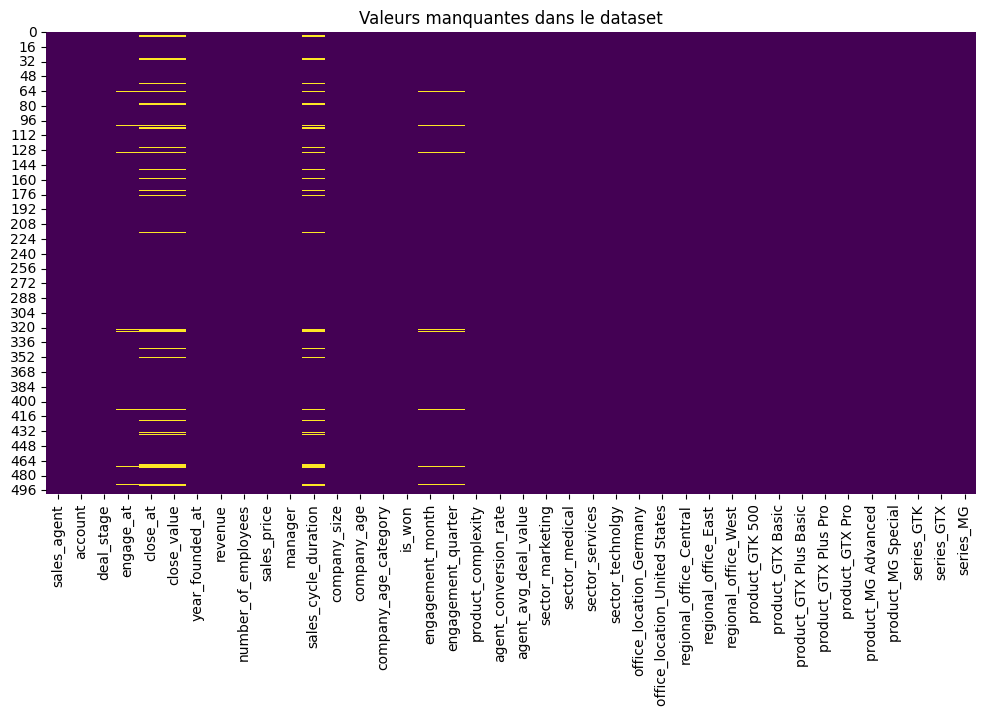

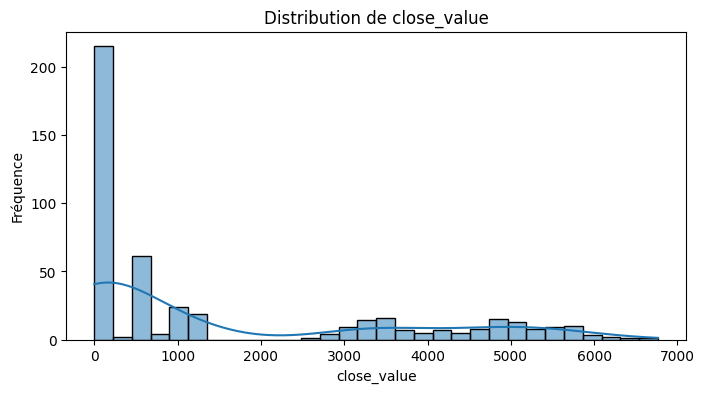

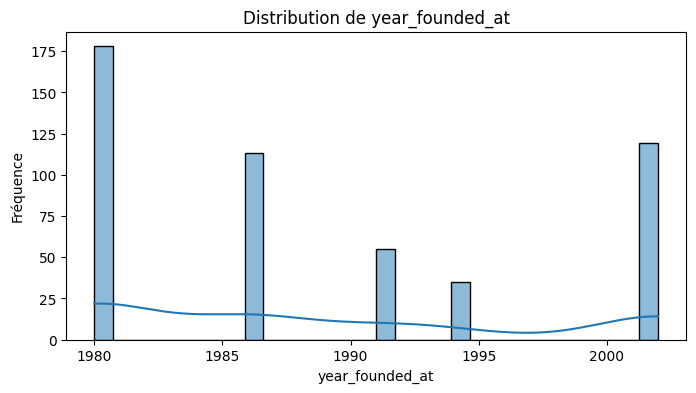

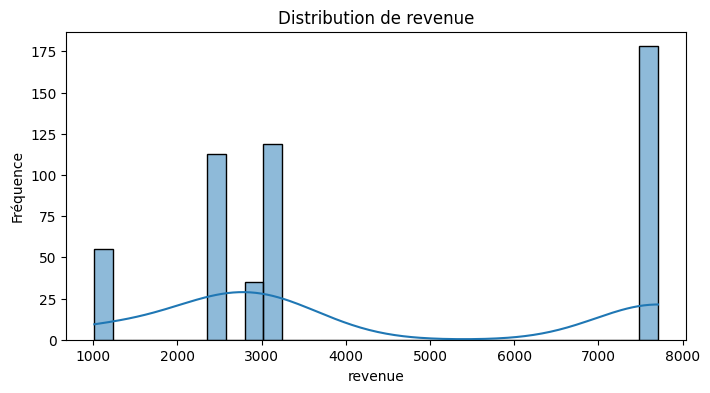

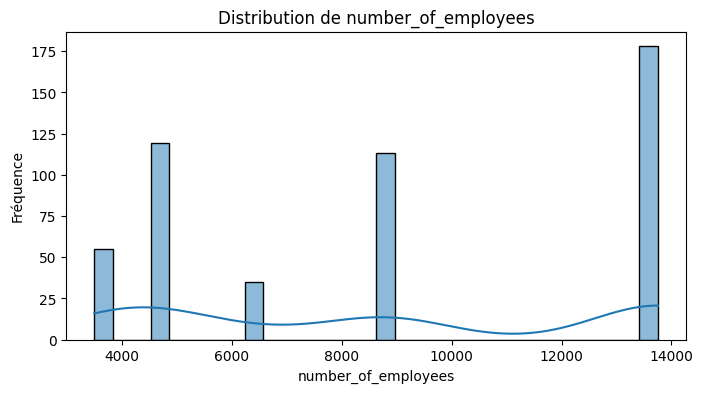

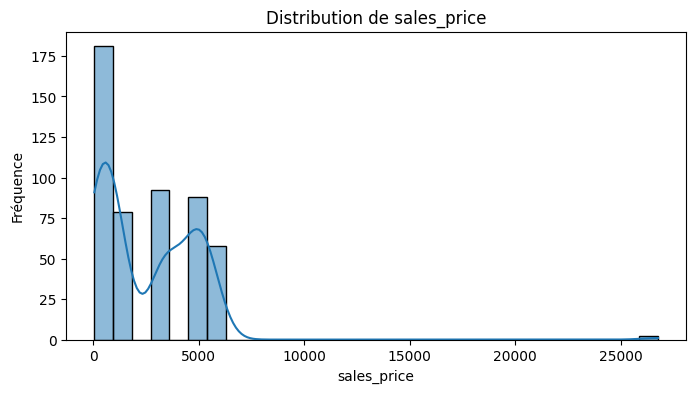

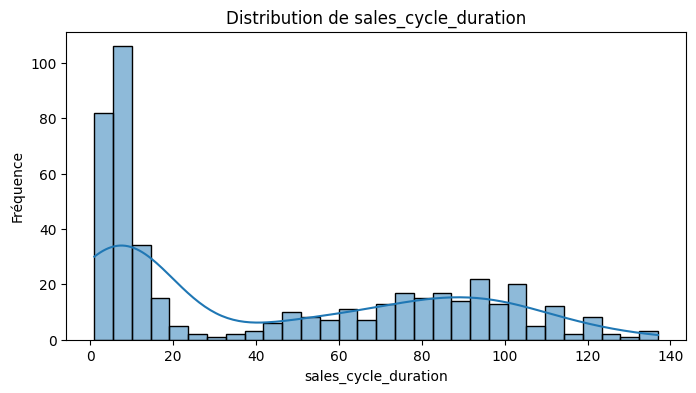

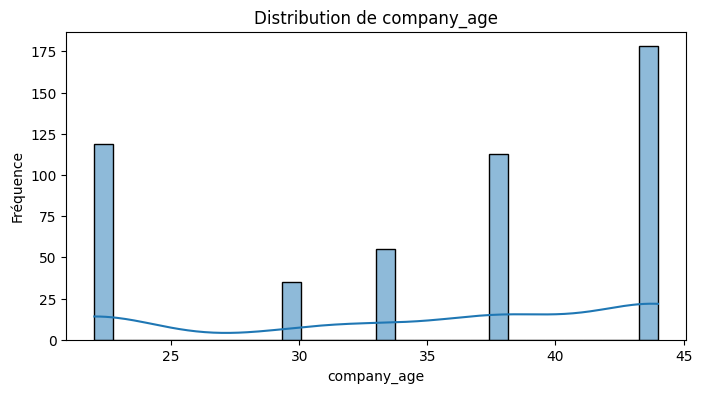

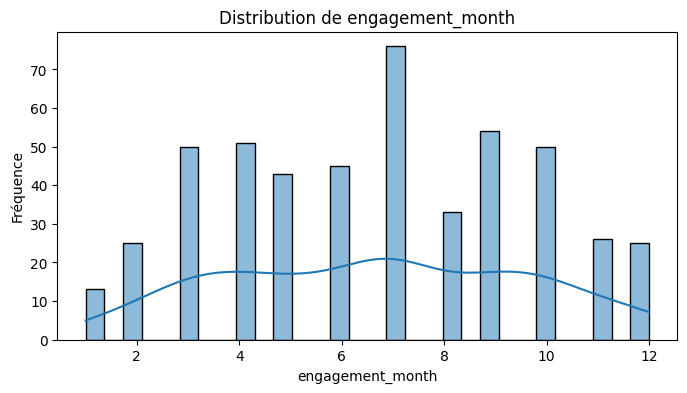

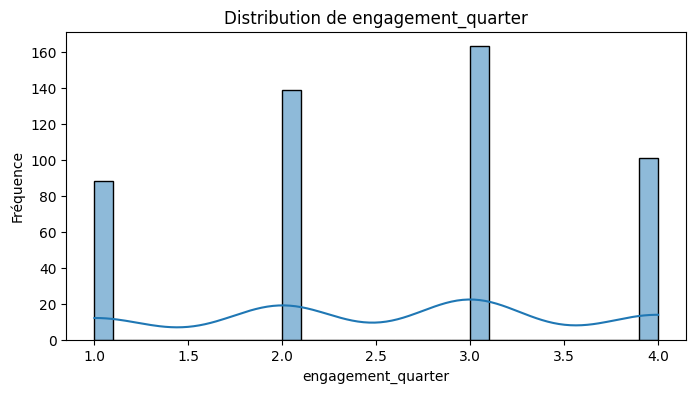

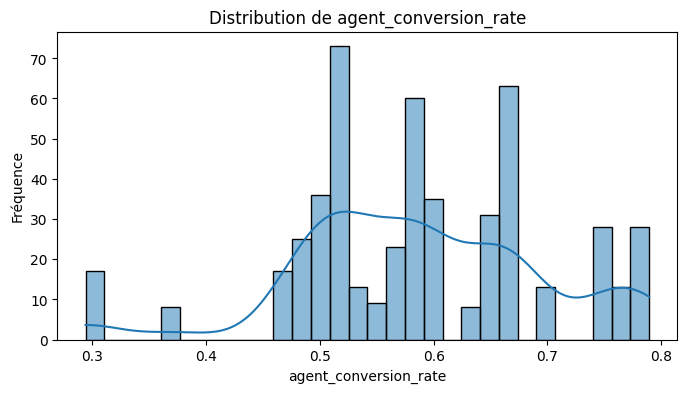

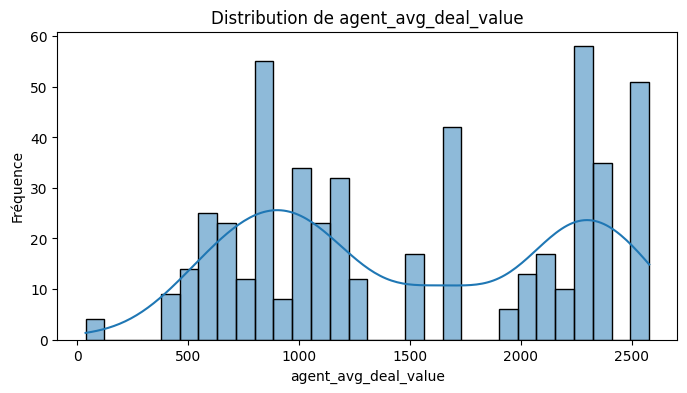

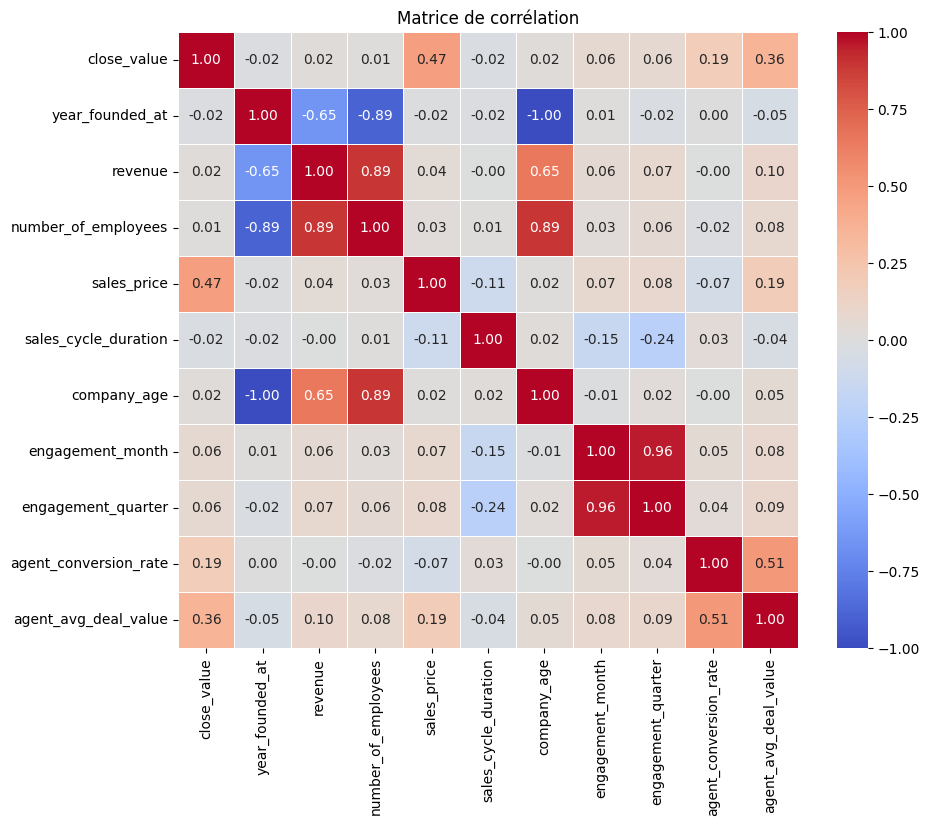

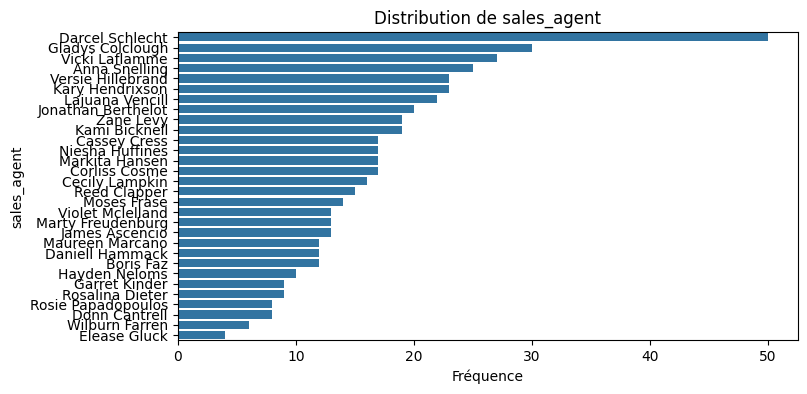

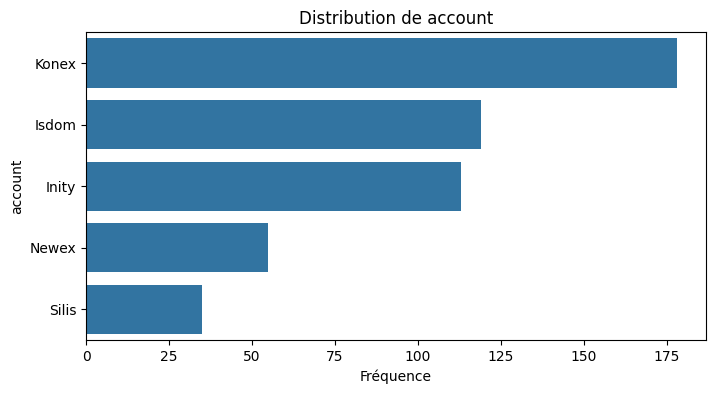

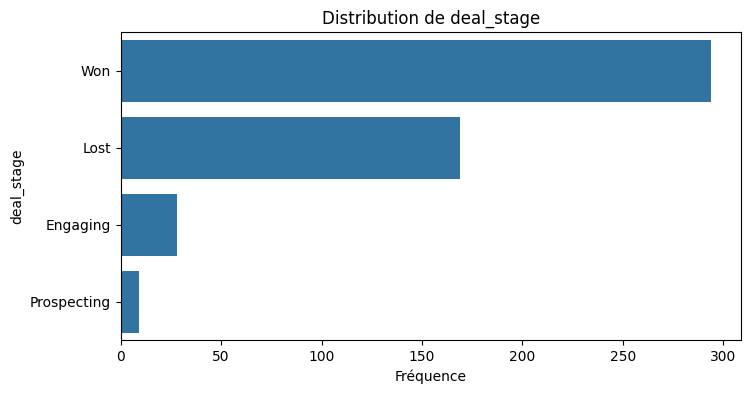

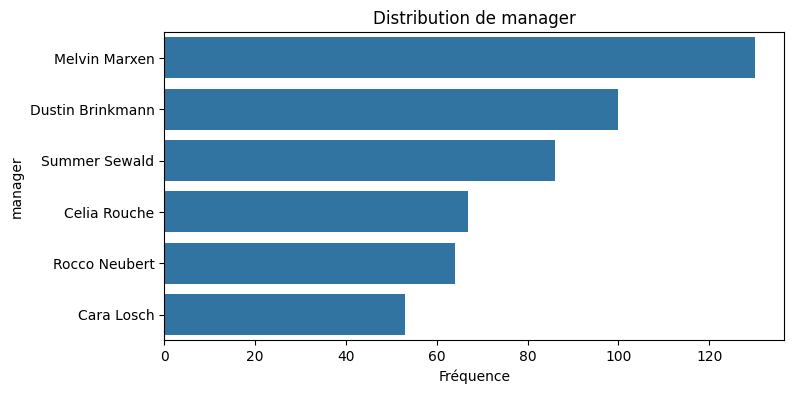

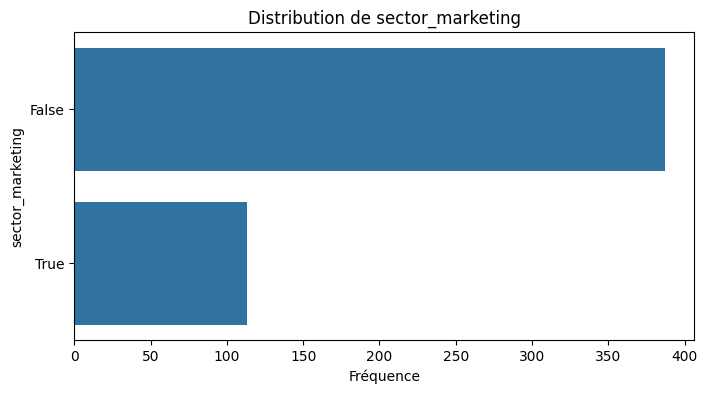

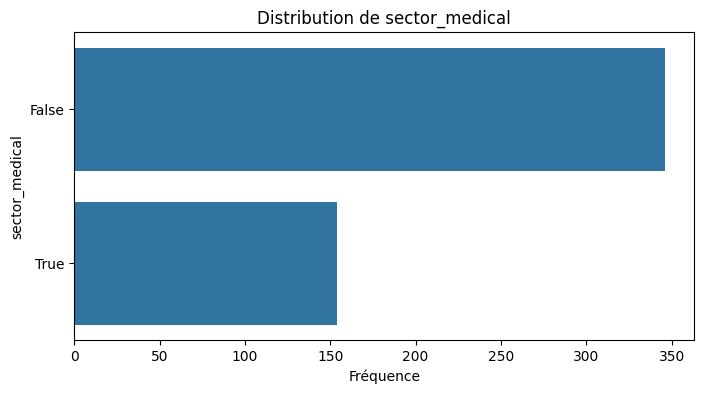

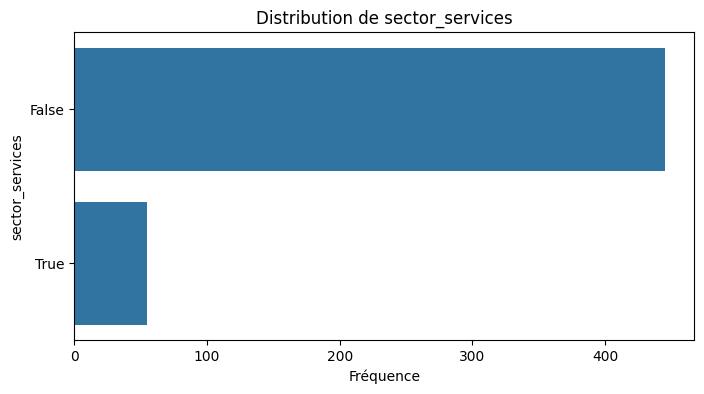

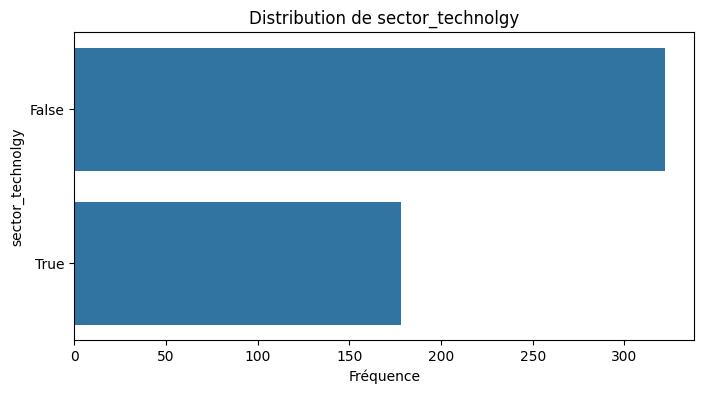

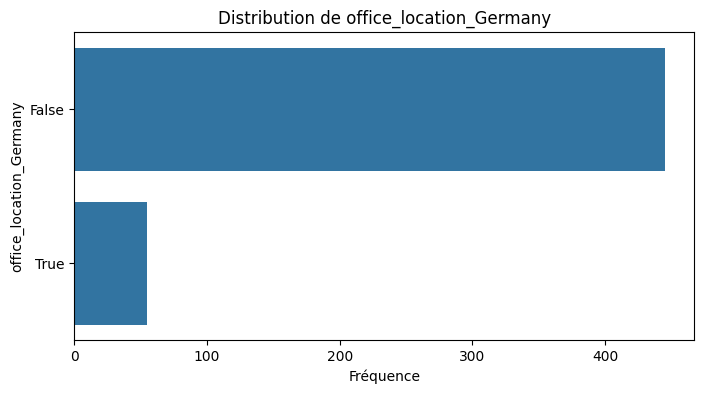

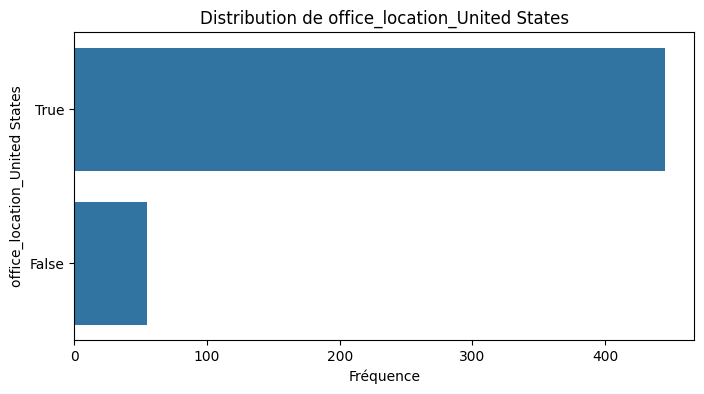

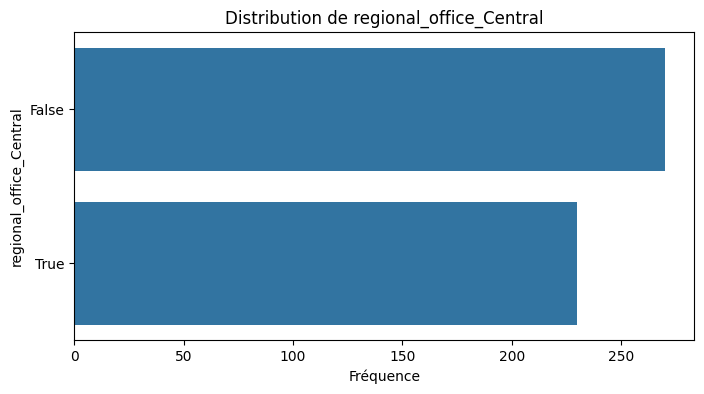

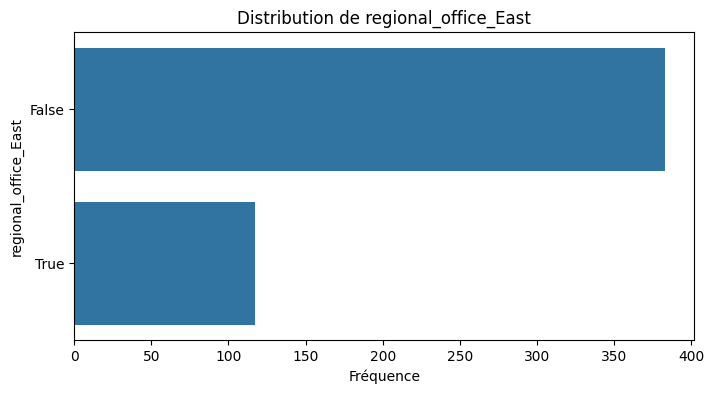

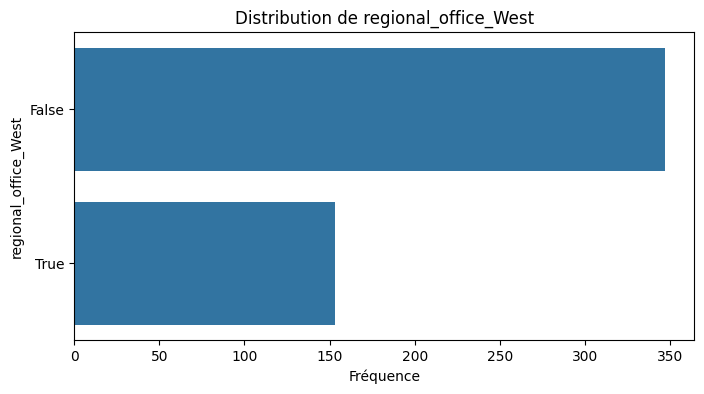

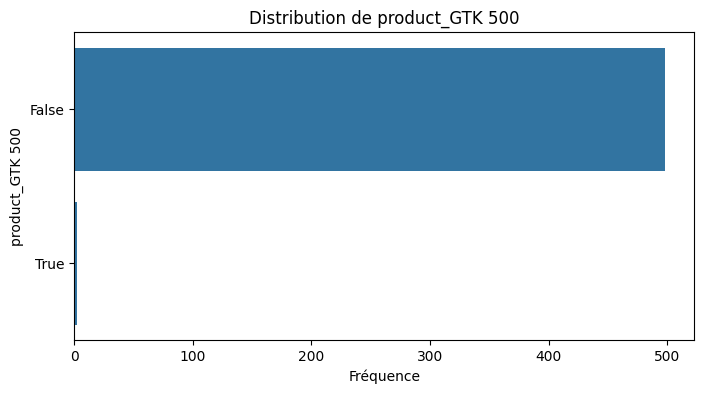

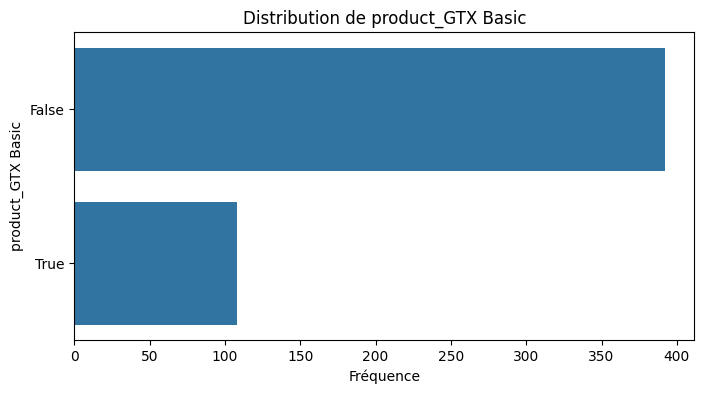

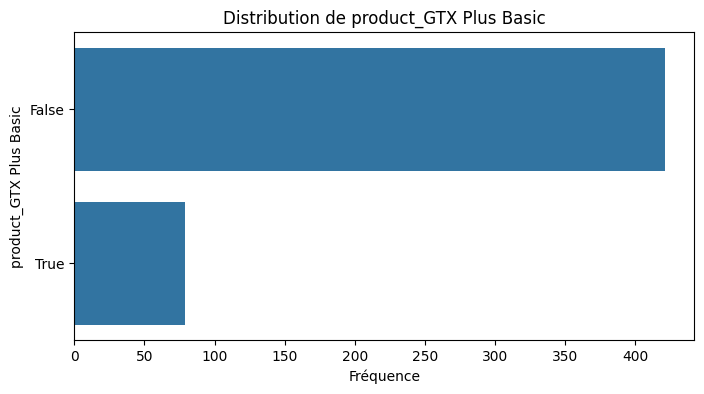

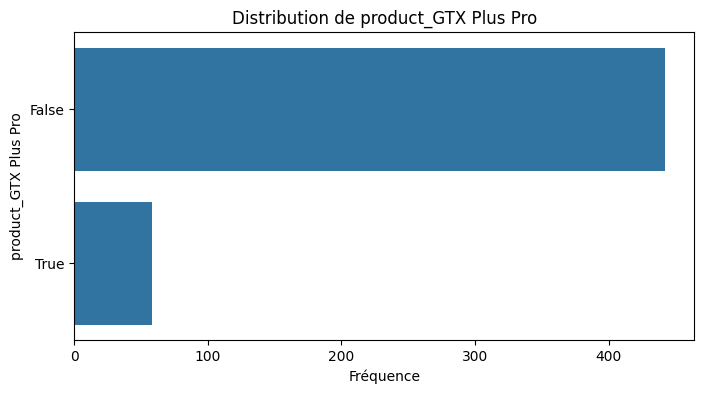

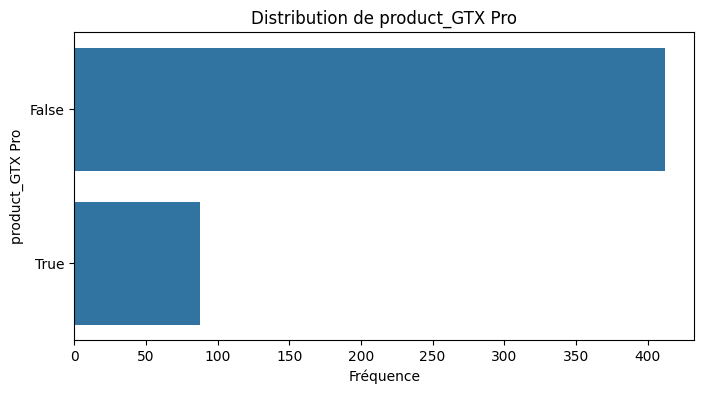

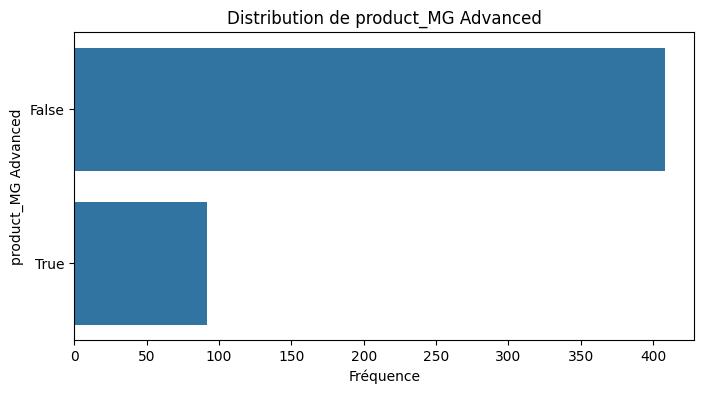

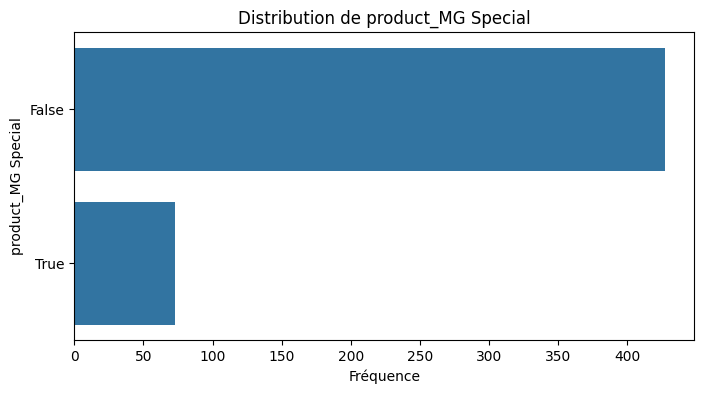

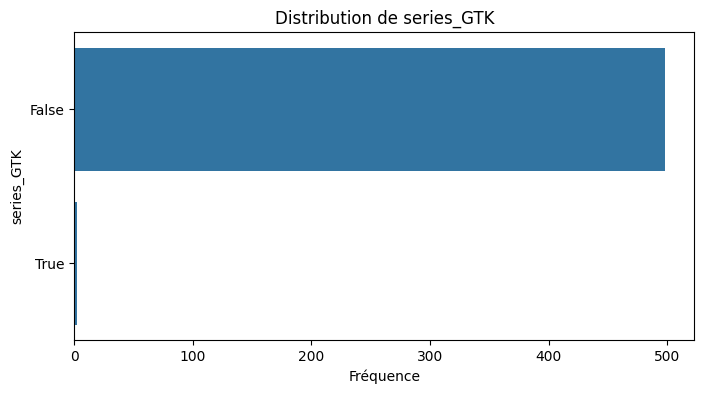

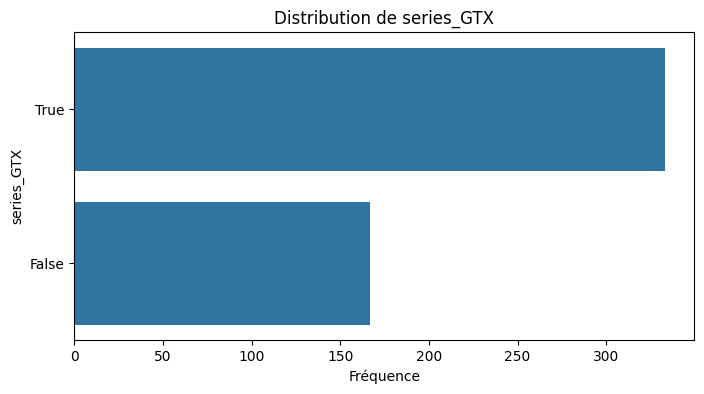

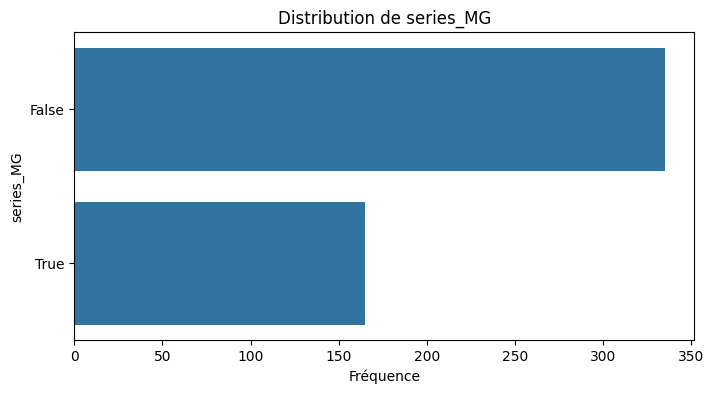

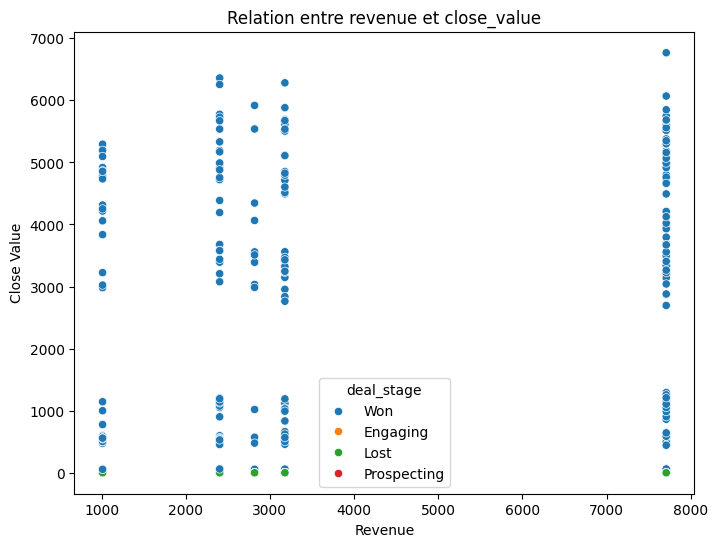

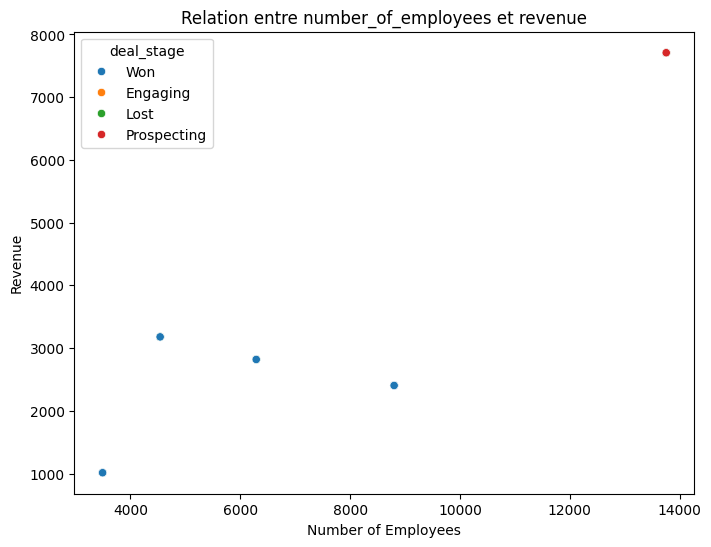

C:\Users\liman\AppData\Local\Temp\ipykernel_142440\2820979392.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_summary.values, y=product_summary.index, palette="viridis")


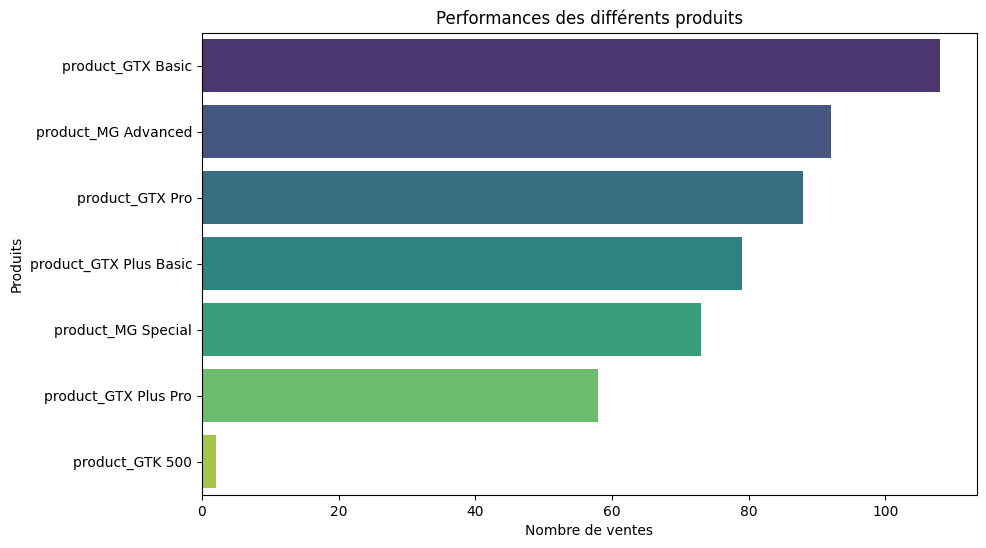

C:\Users\liman\AppData\Local\Temp\ipykernel_142440\2820979392.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agents.values, y=top_agents.index, palette="viridis")


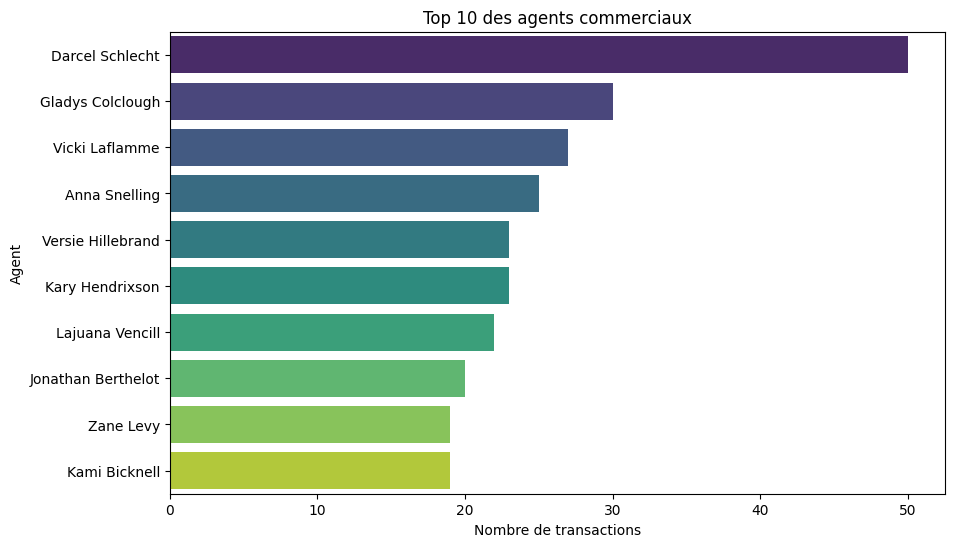

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification de la structure et des premières lignes du dataframe
print("Structure du dataframe :")
print(preprocessed_df.info())

print("\nAperçu des premières lignes :")
print(preprocessed_df.head())

# 1. Résumé statistique des variables numériques
print("\nRésumé statistique :")
print(preprocessed_df.describe())

# 2. Analyse des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(preprocessed_df.isnull().sum())

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(preprocessed_df.isnull(), cbar=False, cmap="viridis")
plt.title("Valeurs manquantes dans le dataset")
plt.show()

# 3. Analyse de la distribution des variables numériques
num_cols = preprocessed_df.select_dtypes(include=["float64", "int64"]).columns

# Distribution des colonnes numériques
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(preprocessed_df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# 4. Analyse des corrélations entre variables numériques
plt.figure(figsize=(10, 8))
correlation_matrix = preprocessed_df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

# 5. Analyse des variables catégoriques
cat_cols = preprocessed_df.select_dtypes(include=["object", "bool"]).columns

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=preprocessed_df, y=col, order=preprocessed_df[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.xlabel("Fréquence")
    plt.ylabel(col)
    plt.show()

# 6. Analyse de la relation entre certaines variables clés
# Relation entre `revenue` et `close_value`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=preprocessed_df, x="revenue", y="close_value", hue="deal_stage")
plt.title("Relation entre revenue et close_value")
plt.xlabel("Revenue")
plt.ylabel("Close Value")
plt.show()

# Relation entre `number_of_employees` et `revenue`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=preprocessed_df, x="number_of_employees", y="revenue", hue="deal_stage")
plt.title("Relation entre number_of_employees et revenue")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue")
plt.show()

# 7. Analyse des performances des produits
# Filtrer uniquement les colonnes commençant par 'product_' qui sont booléennes ou numériques
product_cols = [
    col for col in preprocessed_df.columns 
    if col.startswith("product_") and preprocessed_df[col].dtype in ['bool', 'int64', 'float64']
]

# Calcul de la somme pour chaque produit
product_summary = preprocessed_df[product_cols].sum().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=product_summary.values, y=product_summary.index, palette="viridis")
plt.title("Performances des différents produits")
plt.xlabel("Nombre de ventes")
plt.ylabel("Produits")
plt.show()


# 8. Analyse des performances des agents commerciaux
plt.figure(figsize=(10, 6))
top_agents = preprocessed_df["sales_agent"].value_counts().head(10)
sns.barplot(x=top_agents.values, y=top_agents.index, palette="viridis")
plt.title("Top 10 des agents commerciaux")
plt.xlabel("Nombre de transactions")
plt.ylabel("Agent")
plt.show()


#### 1.1 Analyse de l'EDA

Le dataset contient 500 lignes et 41 colonnes, avec des informations variées sur les opportunités de vente, les clients, les produits, et les performances des agents commerciaux. Les clients présentent une forte variabilité, avec un revenu moyen de 4352,49 millions USD (min : 1012,72, max : 7708,38) et un effectif moyen de 8791 employés. Les produits, quant à eux, affichent des prix moyens de 2515,79 USD, variant de 55 à 26768 USD, ce qui justifie leur classification en termes de complexité. Les cycles de vente durent en moyenne 43,6 jours, mais peuvent atteindre 137 jours. Les données montrent un taux de conversion moyen de 58,8 % parmi les agents, et une valeur moyenne par opportunité clôturée (closed_value) de 1504,18 USD. Certaines colonnes, notamment les dates d’engagement et de clôture, ainsi que les revenus associés, présentent des valeurs manquantes, probablement liées à des opportunités non conclues ou en cours. Ces données offrent une base solide pour analyser les performances des agents, les préférences des clients, et les facteurs influençant le succès des ventes.

#### 1.2 Traitement complémentaire des Valeurs Manquantes et Colonnes

Avant de passer aux étapes de modélisation et d'analyse, nous devons traiter les valeurs manquantes et ajuster certaines colonnes pour garantir la cohérence et la qualité des données. Voici les étapes prévues :

- **Création de la colonne `sale_margin`** :
  - Une nouvelle colonne sera calculée comme la différence entre `sales_price` et `close_value`, représentant la marge de négociation sur les ventes.
  - Cela permettra d’analyser l’impact des marges sur la performance des opportunités.

- **Création de la colonne `revenue_per_employee`** :
  - Une nouvelle colonne sera calculée comme le rapport entre `revenue` (chiffre d'affaires annuel) et `number_of_employees`, ce qui permet d’évaluer la productivité moyenne des employés d’une entreprise cliente.
  - Cette métrique est pertinente pour mieux comprendre la structure des clients et leurs capacités financières.

- **Suppression de la colonne `close_at`** :
  - La colonne contient 37 valeurs manquantes représentant les dates exactes de clôture des contrats. Remplacer ces valeurs par des estimations est délicat.
  - Nous supprimerons cette colonne tout en conservant `sales_cycle_duration`, qui mesure la durée entre `engage_at` et `close_at`.
  - Les valeurs manquantes de `sales_cycle_duration` seront remplacées par sa moyenne.

- **Traitement de la colonne `engage_at`** :
  - Cette colonne contient 9 valeurs manquantes, correspondant à des lignes où `deal_stage` est égal à "Prospecting".
  - Nous supprimerons `engage_at` pour simplifier les données, tout en conservant la colonne dérivée `engagement_quarter`, qui est plus adaptée pour des prédictions grâce à sa granularité réduite.

Ces ajustements permettront de réduire les valeurs manquantes, enrichir le dataset avec des indicateurs clés (`sale_margin`, `revenue_per_employee`), et maximiser l'utilité des variables conservées dans le cadre de l'analyse et des modèles prédictifs.


In [5]:
import pandas as pd
import numpy as np

# Copie du DataFrame pour éviter d'altérer les données originales
processed_df = preprocessed_df.copy()

# 1. Création de la colonne `sale_margin`
# Calcul de la marge de négociation (différence entre `sales_price` et `close_value`)
processed_df['sale_margin'] = processed_df['sales_price'] - processed_df['close_value']

# 2. Création de la colonne `revenue_per_employee`
# Calcul du chiffre d'affaires par employé
# Vérification préalable pour éviter les divisions par zéro
processed_df['revenue_per_employee'] = processed_df['revenue'] / processed_df['number_of_employees']
processed_df['revenue_per_employee'] = processed_df['revenue_per_employee'].replace([np.inf, -np.inf], np.nan)

# 3. Suppression de la colonne `close_at` et traitement de `sales_cycle_duration`
# Remplacement des valeurs manquantes de `sales_cycle_duration` par sa moyenne
sales_cycle_mean = processed_df['sales_cycle_duration'].mean()
processed_df['sales_cycle_duration'] = processed_df['sales_cycle_duration'].fillna(sales_cycle_mean)

# Suppression de la colonne `close_at`
processed_df.drop(columns=['close_at'], inplace=True)

# 4. Suppression de la colonne `engage_at` et conservation de `engagement_quarter`
# Vérification des valeurs de `deal_stage` correspondant aux lignes manquantes dans `engage_at`
missing_engage_rows = processed_df[processed_df['engage_at'].isnull()]
assert all(missing_engage_rows['deal_stage'] == "Prospecting"), "Certaines valeurs manquantes dans engage_at ne sont pas prospecting"

# Suppression de la colonne `engage_at`
processed_df.drop(columns=['engage_at'], inplace=True)

# Vérification finale des colonnes restantes et des valeurs manquantes
print("Colonnes restantes après traitements :")
print(processed_df.columns)

print("\nValeurs manquantes après traitements :")
print(processed_df.isnull().sum())

# Aperçu des premières lignes
print("\nAperçu des premières lignes après traitements :")
print(processed_df.head())

# Sauvegarde du DataFrame traité
processed_df.to_csv("processed_crm_data.csv", index=False)


Colonnes restantes après traitements :
Index(['sales_agent', 'account', 'deal_stage', 'close_value',
       'year_founded_at', 'revenue', 'number_of_employees', 'sales_price',
       'manager', 'sales_cycle_duration', 'company_size', 'company_age',
       'company_age_category', 'is_won', 'engagement_month',
       'engagement_quarter', 'product_complexity', 'agent_conversion_rate',
       'agent_avg_deal_value', 'sector_marketing', 'sector_medical',
       'sector_services', 'sector_technolgy', 'office_location_Germany',
       'office_location_United States', 'regional_office_Central',
       'regional_office_East', 'regional_office_West', 'product_GTK 500',
       'product_GTX Basic', 'product_GTX Plus Basic', 'product_GTX Plus Pro',
       'product_GTX Pro', 'product_MG Advanced', 'product_MG Special',
       'series_GTK', 'series_GTX', 'series_MG', 'sale_margin',
       'revenue_per_employee'],
      dtype='object')

Valeurs manquantes après traitements :
sales_agent              

In [20]:
processed_df.head(5)

,sales_agent,account,deal_stage,close_value,year_founded_at,revenue,number_of_employees,sales_price,manager,sales_cycle_duration,...,product_GTX Plus Basic,product_GTX Plus Pro,product_GTX Pro,product_MG Advanced,product_MG Special,series_GTK,series_GTX,series_MG,sale_margin,revenue_per_employee
0,Cecily Lampkin,Inity,Won,5537.0,1986,2403.58,8801,5482,Dustin Brinkmann,2.000000,...,False,True,False,False,False,False,True,False,-55.0,0.273103
1,Cecily Lampkin,Inity,Won,1200.0,1986,2403.58,8801,1096,Dustin Brinkmann,2.000000,...,True,False,False,False,False,False,True,False,-104.0,0.273103
2,Cecily Lampkin,Inity,Won,590.0,1986,2403.58,8801,550,Dustin Brinkmann,2.000000,...,False,False,False,False,False,False,True,False,-40.0,0.273103
3,Cecily Lampkin,Inity,Won,3670.0,1986,2403.58,8801,3393,Dustin Brinkmann,66.000000,...,False,False,False,True,False,False,False,True,-277.0,0.273103
4,Zane Levy,Inity,Engaging,NaN,1986,2403.58,8801,550,Summer Sewald,43.645788,...,False,False,False,False,False,False,True,False,NaN,0.273103


In [16]:
preprocessed_df

,sales_agent,account,deal_stage,engage_at,close_at,close_value,year_founded_at,revenue,number_of_employees,sales_price,...,product_GTK 500,product_GTX Basic,product_GTX Plus Basic,product_GTX Plus Pro,product_GTX Pro,product_MG Advanced,product_MG Special,series_GTK,series_GTX,series_MG
0,Cecily Lampkin,Inity,Won,2017-07-14,2017-07-16,5537.0,1986,2403.58,8801,5482,...,False,False,False,True,False,False,False,False,True,False
1,Cecily Lampkin,Inity,Won,2017-10-18,2017-10-20,1200.0,1986,2403.58,8801,1096,...,False,False,True,False,False,False,False,False,True,False
2,Cecily Lampkin,Inity,Won,2017-07-06,2017-07-08,590.0,1986,2403.58,8801,550,...,False,True,False,False,False,False,False,False,True,False
3,Cecily Lampkin,Inity,Won,2017-03-29,2017-06-03,3670.0,1986,2403.58,8801,3393,...,False,False,False,False,False,True,False,False,False,True
4,Zane Levy,Inity,Engaging,2017-11-27,NaT,NaN,1986,2403.58,8801,550,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Reed Clapper,Silis,Won,2017-03-17,2017-03-27,4064.0,1994,2818.38,6290,4821,...,False,False,False,False,True,False,False,False,True,False
496,Reed Clapper,Silis,Lost,2017-04-05,2017-04-06,0.0,1994,2818.38,6290,550,...,False,True,False,False,False,False,False,False,True,False
497,Reed Clapper,Silis,Lost,2017-09-07,2017-11-27,0.0,1994,2818.38,6290,5482,...,False,False,False,True,False,False,False,False,True,False
498,Reed Clapper,Silis,Lost,2017-07-12,2017-07-14,0.0,1994,2818.38,6290,4821,...,False,False,False,False,True,False,False,False,True,False


## Modèles de Machine Learning et Variables à Prédire

Pour exploiter les données consolidées et prétraitées, plusieurs modèles de machine learning seront appliqués pour répondre à des objectifs spécifiques. Ces modèles permettront de prédire des comportements, d’anticiper des tendances et de segmenter des acteurs clés pour une optimisation des processus.

---

### 1. Prédiction du mois d'engagement (`engagement_month`)
- **Objectif** : Anticiper le mois où une opportunité passe en phase "Engaging", en particulier pour celles actuellement en phase "Prospecting".
- **Variable cible** : `engagement_month` (valeurs de 1 à 12).
- **Approche** :
  - Un modèle de **classification multi-classes** sera utilisé, car les mois sont discrets et distincts.
  - **Caractéristiques potentielles** :
    - Informations sur le client : `company_age_category`, `office_location`, `revenue`.
    - Informations sur l'opportunité : `product`, `deal_stage`.
    - Variables temporelles disponibles, comme `engagement_quarter`.

---

### 2. Prédiction de l'état des opportunités (`deal_stage`)
- **Objectif** : Identifier si une opportunité en phase "Engaging" ou "Prospecting" deviendra "Won" (gagnée) ou "Lost" (perdue).
- **Variable cible** : `is_won` (1 pour "Won", 0 pour "Lost"), actuellement vide pour ces phases.
- **Approche** :
  - Un modèle de **classification supervisée** sera utilisé pour prédire cette variable.
  - **Caractéristiques potentielles** :
    - Informations sur le client : `revenue`, `number_of_employees`, `sector`, `company_size`.
    - Informations sur l'opportunité : `sales_price`, `product_complexity`, `sales_cycle_duration`.
    - Performances des agents commerciaux : `agent_conversion_rate`, `agent_avg_deal_value`.

---

### 3. Prédiction de la valeur des opportunités (`close_value`)
- **Objectif** : Prédire la valeur de `close_value` pour les opportunités qui seront "Won".
- **Variable cible** : `close_value` (valeur monétaire du deal).
- **Approche** :
  - Un modèle de **régression supervisée** sera utilisé pour prédire cette variable continue.
  - **Caractéristiques potentielles** :
    - Informations sur le client : `revenue`, `company_size`, `number_of_employees`.
    - Informations sur l'opportunité : `product_complexity`, `sales_price`, `sales_cycle_duration`.
    - Informations temporelles : `engagement_month`, `engagement_quarter`.

---

### 4. Segmentation des clients
- **Objectif** : Grouper les clients selon leurs caractéristiques pour identifier des segments homogènes et créer des stratégies adaptées (marketing, vente, etc.).
- **Approche** :
  - Un **modèle de clustering** (par exemple, K-Means ou DBSCAN) sera utilisé pour regrouper les clients.
  - **Caractéristiques potentielles** :
    - Données démographiques : `revenue`, `number_of_employees`, `sector`, `company_size`.
    - Données comportementales : `sales_cycle_duration`, `revenue_per_employee`, `product_complexity`.

---

### 5. Segmentation des agents commerciaux
- **Objectif** : Identifier des groupes d'agents commerciaux homogènes pour mieux comprendre leurs performances et permettre un matching stratégique avec des segments de clients.
- **Approche** :
  - Un **modèle de clustering** (par exemple, K-Means ou Hierarchical Clustering) sera utilisé pour regrouper les agents.
  - **Caractéristiques potentielles** :
    - Taux de conversion : `agent_conversion_rate`.
    - Valeur moyenne par opportunité : `agent_avg_deal_value`.
    - Performances globales sur des segments de produits ou de clients.

---

### Résumé des modèles et objectifs

| **Objectif**                     | **Variable cible**      | **Type de Modèle**         | **Approche**              |
|----------------------------------|-------------------------|----------------------------|---------------------------|
| Prédiction du mois d'engagement  | `engagement_month`      | Classification multi-classes | Logistic Regression, Decision Tree |
| Prédiction du deal stage         | `is_won`               | Classification supervisée   | Random Forest, XGBoost    |
| Prédiction de la valeur des deals | `close_value`          | Régression supervisée       | Linear Regression, XGBoost |
| Segmentation des clients         | Non applicable         | Clustering non supervisé    | K-Means, DBSCAN           |
| Segmentation des agents          | Non applicable         | Clustering non supervisé    | K-Means, Hierarchical      |

---

### Raisonnement
La séquence des prédictions suit une logique chronologique, facilitant l'exploitation des résultats pour une prise de décision progressive. De plus, prévoir la valeur de `close_value` uniquement pour les opportunités "Won" est pertinent pour éviter des prédictions inutiles ou contradictoires sur des deals "Lost". Cette approche garantit une utilisation optimale des données et des modèles.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#### 1. Prédiction de engagement_month

c:\Users\liman\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\liman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\liman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Classification Report pour `engagement_month` :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         1
         3.0       0.70      0.78      0.74         9
         4.0       0.44      0.73      0.55        11
         5.0       0.60      0.55      0.57        11
         6.0       0.50      0.20      0.29        10
         7.0       0.52      0.87      0.65        15
         8.0       0.00      0.00      0.00         9
         9.0       0.45      0.42      0.43        12
        10.0       0.40      1.00      0.57         4
        11.0       0.00      0.00      0.00         6
        12.0       0.83      0.83      0.83         6

    accuracy                           0.51        99
   macro avg       0.37      0.45      0.39        99
weighted avg       0.43      0.51      0.45        99



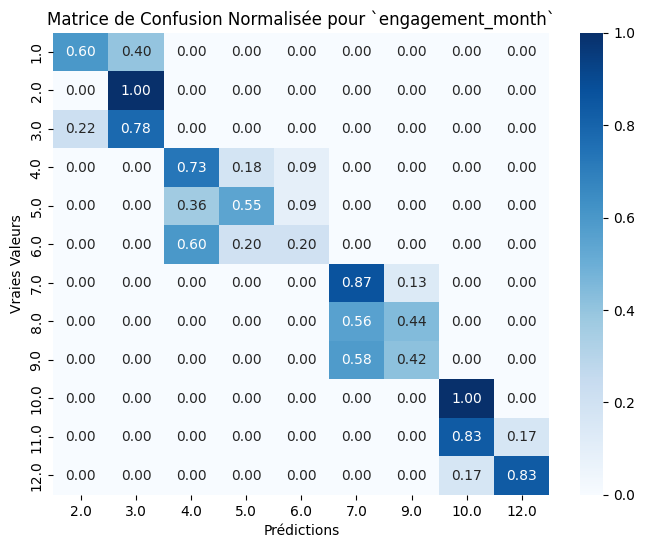

In [23]:
# Étape 1 : Préparation des Données
features = ['company_age', 'revenue_per_employee', 'sales_cycle_duration','engagement_quarter']
target = 'engagement_month'

# Vérifier l'existence de valeurs cibles non manquantes pour `engagement_month`
processed_df = processed_df[processed_df[target].notna()]

# Séparation des données
X = processed_df[features]
y = processed_df[target]

# Encodage des variables catégoriques si nécessaire
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 2 : Sélection et Entraînement du Modèle
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Étape 3 : Évaluation du Modèle
y_pred = log_reg.predict(X_test)
print("Classification Report pour `engagement_month` :")
print(classification_report(y_test, y_pred))

# Étape 4 : Interprétation et Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, normalize='index'), annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice de Confusion Normalisée pour `engagement_month`")
plt.xlabel("Prédictions")
plt.ylabel("Vraies Valeurs")
plt.show()


In [20]:
# Données avec valeurs non manquantes (pour entraîner le modèle)
train_data = processed_df[processed_df['engagement_month'].notna()]

# Données avec valeurs manquantes (pour prédire plus tard)
predict_data = processed_df[processed_df['engagement_month'].isna()]


In [21]:
features = ['company_age', 'revenue_per_employee', 'sales_cycle_duration', 'engagement_quarter']
target = 'engagement_month'

X_train = train_data[features]
y_train = train_data[target]

# Encodage des variables catégoriques si nécessaire
X_train = pd.get_dummies(X_train, drop_first=True)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Diviser les données d'entraînement pour validation croisée
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Entraîner un modèle (par exemple, Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Évaluer le modèle
y_val_pred = rf_model.predict(X_val)
print("Classification Report sur les données de validation :")
print(classification_report(y_val, y_val_pred))


Classification Report sur les données de validation :
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         1
         3.0       0.80      0.44      0.57         9
         4.0       0.42      0.45      0.43        11
         5.0       0.40      0.55      0.46        11
         6.0       0.40      0.20      0.27        10
         7.0       0.43      0.40      0.41        15
         8.0       0.17      0.11      0.13         9
         9.0       0.50      0.67      0.57        12
        10.0       0.50      1.00      0.67         4
        11.0       1.00      0.33      0.50         6
        12.0       0.83      0.83      0.83         6

    accuracy                           0.43        99
   macro avg       0.45      0.42      0.40        99
weighted avg       0.48      0.43      0.43        99



#### 2. Prédiction de deal_stage

Classification Report pour `is_won` :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



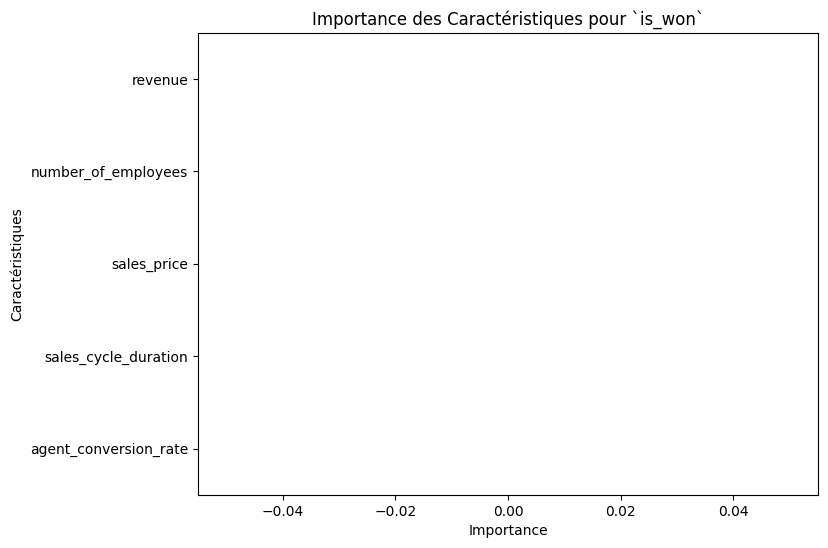

In [25]:
# Étape 1 : Préparation des Données
features = ['revenue', 'number_of_employees', 'sales_price', 'sales_cycle_duration', 'agent_conversion_rate']
target = 'is_won'

# Filtrer les opportunités dans les phases "Engaging" ou "Prospecting"
filtered_df = processed_df[processed_df['deal_stage'].isin(['Engaging', 'Prospecting'])]

X = filtered_df[features]
y = filtered_df[target]

# Encodage des variables catégoriques si nécessaire
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 2 : Sélection et Entraînement du Modèle
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Étape 3 : Évaluation du Modèle
y_pred = rf_clf.predict(X_test)
print("Classification Report pour `is_won` :")
print(classification_report(y_test, y_pred))

# Étape 4 : Interprétation et Visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_clf.feature_importances_, y=features)
plt.title("Importance des Caractéristiques pour `is_won`")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()


In [26]:
print(X.var())


revenue                  3.976404e+06
number_of_employees      1.096836e+07
sales_price              5.083395e+06
sales_cycle_duration     0.000000e+00
agent_conversion_rate    1.793916e-02
dtype: float64


In [27]:
# Visualiser les importances des caractéristiques
importances = rf_clf.feature_importances_

# Vérifier si toutes les importances sont nulles ou faibles
if not any(importances):
    print("Toutes les importances des caractéristiques sont nulles. Vérifiez vos données ou le modèle.")
else:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=features)
    plt.title("Importance des Caractéristiques pour `is_won`")
    plt.xlabel("Importance")
    plt.ylabel("Caractéristiques")
    plt.show()


Toutes les importances des caractéristiques sont nulles. Vérifiez vos données ou le modèle.


#### 3. Prélection de close_value

Mean Squared Error pour `close_value` : 127872.57
R² Score pour `close_value` : 0.97


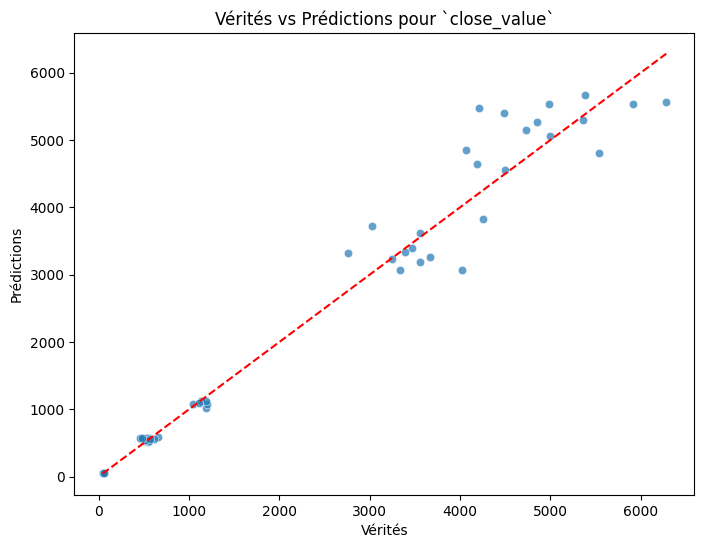

In [24]:
# Étape 1 : Préparation des Données
features = ['revenue', 'number_of_employees', 'sales_price', 'sales_cycle_duration', 'engagement_month']
target = 'close_value'

# Filtrer les opportunités où `is_won` == 1
filtered_df = processed_df[processed_df['is_won'] == 1]

X = filtered_df[features]
y = filtered_df[target]

# Encodage des variables catégoriques si nécessaire
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 2 : Sélection et Entraînement du Modèle
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Étape 3 : Évaluation du Modèle
y_pred = rf_reg.predict(X_test)
print(f"Mean Squared Error pour `close_value` : {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score pour `close_value` : {r2_score(y_test, y_pred):.2f}")

# Étape 4 : Interprétation et Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title("Vérités vs Prédictions pour `close_value`")
plt.xlabel("Vérités")
plt.ylabel("Prédictions")
plt.show()


### Graph theory for agent closseness to sector or Company category